--- 
## <center>Практична робота № 9<center>
## Тема: 
### Стиснення даних. Кодування і декодування Гафмена
## Мета: 
### Набути практичних навичок застосування алгоритму оптимального кодування Гафмена
---                                     

# <center>Хід роботи<center>

## 1. (2-ий варіант) Маємо текст AABABBABACBCAADEEAABABABBCBCAAADEE. Закодувати текст, використовуючи алгоритм Гафмена. Побудувати двійкове дерево. Оцінити ефект від кодування порівняно з неоптимальним випадком.


Неоптимальний випадок: 136 bits
метод алгоритма Гафмена: 70 bits
Різниця: 1.94


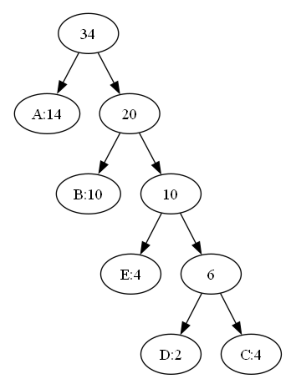

In [2]:
import heapq
from collections import defaultdict
import graphviz
from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Клас для представлення вузла дерева Гафмена
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None
    
    # Порівняння для вставки в heapq
    def __lt__(self, other):
        return self.freq < other.freq

# Побудова дерева Гафмена
def build_huffman_tree(frequencies):
    # Створення черги з вузлів
    heap = [Node(char, freq) for char, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        # Беремо два вузли з найменшою частотою
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        # Створюємо новий вузол з сумарною частотою
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right

        # Додаємо новий вузол назад у чергу
        heapq.heappush(heap, merged)

    return heap[0]

# Отримуємо код для кожного символу
def get_huffman_codes(root, prefix='', codes={}):
    if root is None:
        return codes
    # Якщо це лист, додаємо його код
    if root.char is not None:
        codes[root.char] = prefix
    # Рекурсивно проходимо по лівому та правому піддереву
    get_huffman_codes(root.left, prefix + '0', codes)
    get_huffman_codes(root.right, prefix + '1', codes)
    return codes

# Функція для візуалізації дерева Гафмена
def visualize_huffman_tree(root):
    def add_edges(node, graph, parent=None):
        if node is None:
            return
        if node.char is not None:
            graph.node(str(id(node)), label=f"{node.char}:{node.freq}")
        else:
            graph.node(str(id(node)), label=f"{node.freq}")
        if parent:
            graph.edge(str(id(parent)), str(id(node)))
        if node.left:
            add_edges(node.left, graph, node)
        if node.right:
            add_edges(node.right, graph, node)

    # Створюємо граф
    graph = graphviz.Digraph(format='png')
    add_edges(root, graph)
    
    # Генеруємо зображення та відразу відображаємо
    file_path = graph.render('huffman_tree', format='png', cleanup=True)  # Зберігаємо в файл
    img = mpimg.imread(file_path)  # Завантажуємо зображення
    imgplot = plt.imshow(img)  # Відображаємо зображення
    plt.axis('off')  # Вимикаємо осі
    plt.show()  # Відображаємо зображення відразу

# Оцінка ефекту від кодування
def calculate_compression(text, frequencies, huffman_codes):
    # Оцінка для фіксованого кодування (4 біти на символ)
    original_size = len(text) * 4  # Кількість бітів для фіксованого кодування (по 4 біти на символ)
    
    # Оцінка для кодування Гафменом
    compressed_bits = sum(frequencies[char] * len(huffman_codes[char]) for char in frequencies)

    print(f"\nНеоптимальний випадок: {original_size} bits")
    print(f"метод алгоритма Гафмена: {compressed_bits} bits")
    print(f"Різниця: {original_size / compressed_bits:.2f}")

# Оновлення частоти символів та кодування
frequencies = {
    'A': 14,
    'B': 10,
    'C': 4,
    'D': 2,
    'E': 4,
}

text = 'AABABBABACBCAADEEAABABABBCBCAAADEE'

root = build_huffman_tree(frequencies)
huffman_codes = get_huffman_codes(root)

# Оцінка ефекту від кодування
calculate_compression(text, frequencies, huffman_codes)

# Візуалізація дерева Гафмена та відображення
visualize_huffman_tree(root)

## <center>Контрольні запитання<center>

## 1. Що таке кодування Гафмана та як воно працює?

Кодування Гафмана — це метод стиснення даних без втрат, розроблений Девідом Гафманом у 1952 році. Його основна ідея полягає у створенні оптимального префіксного коду, де символи, які зустрічаються частіше, кодуються коротшими двійковими послідовностями, а рідкісні символи — довшими.

### Принцип роботи:
1. **Визначення частот символів.** Для кожного символу визначається, як часто він зустрічається в даних.
2. **Створення вузлів дерева.** Кожен символ з його частотою представляється як лист у дереві.
3. **Побудова дерева:**
   - Знайдіть два вузли з найменшими частотами.
   - Об'єднайте їх в новий вузол, частота якого дорівнює сумі частот цих двох вузлів.
   - Повторюйте процес, поки не залишиться один вузол (корінь дерева).
4. **Призначення кодів:**
   - Кожен шлях від кореня до листа дерева відповідає двійковому коду символу. Зазвичай, "0" призначається лівій гілці, а "1" — правій.

---

## 2. Як визначається оптимальний двійковий код Гафмана для стиснення даних?

Оптимальний двійковий код визначається через побудову дерева Гафмана:

1. **Збір статистики.** Визначте частоту появи кожного символу в тексті.
2. **Побудова пріоритетної черги.** Розташуйте всі символи у вигляді окремих вузлів у пріоритетній черзі за їх частотою (найменш частотні символи мають найвищий пріоритет).
3. **Злиття вузлів.**
   - Вийміть два вузли з найменшими частотами.
   - Створіть новий вузол, частота якого дорівнює сумі частот обраних вузлів.
   - Помістіть новий вузол назад у чергу.
4. **Продовжуйте злиття, поки залишиться тільки один вузол.** Це буде корінь дерева.
5. **Кодування символів.** Пройдіть від кореня до кожного листа дерева, призначаючи шляху двійкові коди.

---

## 3. Які переваги має кодування Гафмана над іншими методами стиснення даних?

### Переваги:
- **Ефективність:** Забезпечує максимально можливе стиснення для фіксованої частотної таблиці символів.
- **Простота реалізації:** Алгоритм легко зрозуміти та реалізувати, особливо для невеликих наборів даних.
- **Префіксний код:** Жоден код не є префіксом іншого, що дозволяє декодувати дані однозначно без розділювачів.
- **Гнучкість:** Підходить для різних типів даних (текст, зображення, звук) і добре працює з даними, де частоти символів сильно варіюються.
- **Стиснення без втрат:** На відміну від методів зі втратами, таких як JPEG або MP3, забезпечує повне відновлення вихідних даних.

---
  
## 4. Як відбувається декодування даних, закодованих за допомогою кодування Гафмена?

Декодування даних, закодованих за допомогою кодування Гафмана, базується на використанні побудованого дерева Гафмана. 

### Принцип роботи:
1. **Побудова дерева.** Спочатку потрібно мати дерево Гафмана, побудоване на основі частот символів. Це дерево може бути передане разом із закодованими даними або побудоване заново, якщо частоти символів відомі.
2. **Процес декодування:**
   - Починайте з кореня дерева.
   - Читайте двійкові символи (0 або 1) із закодованого потоку.
   - Якщо символ "0" — переходьте до лівої гілки, якщо "1" — до правої.
   - Коли досягнуто листа (символа), записуйте його у вихідний текст.
   - Поверніться до кореня дерева та повторюйте процес, поки не буде прочитано весь закодований потік.

---

## 5. Які є можливі недоліки кодування Гафмана?

### Недоліки:
1. **Неефективність для рівномірних частот:**
   - Якщо всі символи мають однакову частоту, кодування Гафмана не забезпечує значного стиснення.
   
2. **Чутливість до змін у частотах:**
   - Якщо частоти символів змінюються, дерево Гафмана стає неактуальним, і його потрібно будувати заново.
   
3. **Потреба у збереженні дерева:**
   - Для декодування необхідно зберігати дерево або таблицю частот, що може збільшити розмір даних.

4. **Повільність побудови дерева:**
   - Алгоритм побудови дерева може бути ресурсомістким для великих наборів даних.

5. **Відсутність адаптивності:**
   - Кодування Гафмана є статичним, тобто потребує попереднього аналізу даних для побудови частотної таблиці. Це робить його менш ефективним для потокових або динамічних даних.

---

## 6. Для чого використовується побудова дерева в кодуванні Гафмана?

Побудова дерева є ключовим етапом кодування Гафмана, оскільки дерево визначає структуру двійкових кодів для символів.

### Основні функції побудови дерева:
1. **Оптимізація кодування:**
   - Дерево забезпечує побудову оптимального префіксного коду, де символи з вищою частотою отримують коротші коди.

2. **Унікальність кодів:**
   - Завдяки дереву Гафмана жоден код не є префіксом іншого, що гарантує коректне та однозначне декодування.

3. **Збереження частотної структури:**
   - Структура дерева відображає частоти символів у вихідних даних, що допомагає ефективно стиснути дані.

4. **Декодування:**
   - Дерево використовується для покрокового проходження закодованого потоку, що дозволяє відновити вихідні дані.

5. **Гнучкість у стисненні:**
   - Дерево може бути адаптоване до будь-якого набору даних, де символи мають різну частоту, забезпечуючи універсальність алгоритму.